# Logistic Regression Analysis
---
**Research question**: "Is a person considered introverted if they post frequently online but attend social events despite feeling socially exhausted after such events?"

$y = Personality (Introversion)$

$\beta_0 = Intercept$

$\beta_1 = Post\ frequency$

$\beta_2 = Social\ event\ attendance$

$\beta_3 = Drained\ after\ socializing$

$\beta_4 = Time\ spent\ alone$

$$y = \beta_0 + \beta_1x + \beta_2z + \beta_3u + \beta_4v$$

In [2]:
import numpy as np
# Receive dataframe from Preprocessing
%store -r pre_df

np.random.seed(1863)

lra_df = pre_df

In [3]:
lra_df["Personality"] = lra_df["Personality_Extrovert"]
lra_df = lra_df.drop(["Personality_Extrovert", "Personality_Introvert"], axis="columns")
lra_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,4.0,4.0,6.0,13.0,5.0,0,0,1
1,9.0,0.0,0.0,0.0,3.0,1,1,0
2,9.0,1.0,2.0,5.0,2.0,1,1,0
3,0.0,6.0,7.0,14.0,8.0,0,0,1
4,3.0,9.0,4.0,8.0,5.0,0,0,1
...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,0,1
2896,3.0,8.0,3.0,14.0,9.0,0,0,1
2897,4.0,1.0,1.0,4.0,0.0,1,1,0
2898,11.0,1.0,3.0,2.0,0.0,1,1,0


In [5]:
import statsmodels.api as sm

X = lra_df[[
    'Time_spent_Alone', 'Social_event_attendance',
    'Drained_after_socializing', 'Post_frequency'
]]

# Add constant for intercept
X = sm.add_constant(X)
# Target variable
y = lra_df['Personality']

model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.267162
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Personality   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2895
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.6143
Time:                        20:30:58   Log-Likelihood:                -774.77
converged:                       True   LL-Null:                       -2009.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9669      0.343      2.821      0.005       0.295       1.639
Time_spent_Alone             -0.0195      0.035     -0.556      0.578      -0.088       0.049
Social_event_attendance       0.1113      0.044      2.555      0.011       0.026       0.197
Drained_after_socializing    -3.6452      0.288    -12.668      0.000      -4.209      -3.081
Post_frequency                0.1630      0.044      3.719      0.000       0.077       0.249
=============================================================================================
"""

In [6]:
lra_df["Personality"]

0       1
1       0
2       0
3       1
4       1
       ..
2895    1
2896    1
2897    0
2898    0
2899    1
Name: Personality, Length: 2900, dtype: int64

In [8]:
import pandas as pd

predicted_probs = result.predict(X)
predicted_classes = (predicted_probs > 0.5).astype(int)

comparison_df = pd.DataFrame({
    "Actual": y,
    "Predicted": predicted_classes
})
comparison_df.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, predicted_classes)
f"Accuracy: {accuracy:.2f}"

'Accuracy: 0.92'

Confusion Matrix:
 [[1285  124]
 [ 111 1380]]


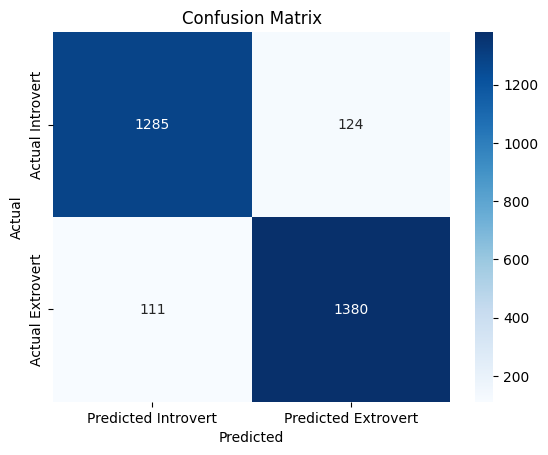

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predicted_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Introvert', 'Predicted Extrovert'],
            yticklabels=['Actual Introvert', 'Actual Extrovert'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [42]:
def validate_input(data):
    validated = {
        'Time_spent_Alone': min(max(data['Time_spent_Alone'], 0), 11),
        'Stage_fear': 1 if data['Stage_fear'] else 0,
        'Social_event_attendance': min(max(data['Social_event_attendance'], 0), 10),
        'Going_outside': min(max(data['Going_outside'], 0), 7),
        'Drained_after_socializing': 1 if data['Drained_after_socializing'] else 0,
        'Friends_circle_size': min(max(data['Friends_circle_size'], 0), 15),
        'Post_frequency': min(max(data['Post_frequency'], 0), 10)
    }
    return validated

In [43]:
import numpy as np
import pandas as pd

user_input = {
    'Time_spent_Alone': 8,
    'Stage_fear': True,
    'Social_event_attendance': 7,
    'Going_outside': 5,
    'Drained_after_socializing': False,
    'Friends_circle_size': 5,
    'Post_frequency': 8
}

validated_input = validate_input(user_input)
new_data = pd.DataFrame([validated_input])

# Add constant term
new_data = pd.DataFrame([validated_input])
new_data.insert(0, 'const', 1)

prob = result.predict(new_data)[0]
print(f"Probability of being Extrovert: {prob:.3f}")

Probability of being Extrovert: 0.656
